In [1]:
# 疑集型クラスタリング
# 個々のデータポイントをそれぞれ個別のクラスタとして開始し、もっとも類似したクラスタを併合していく。
# これらが終了条件を満たすまで続けていく

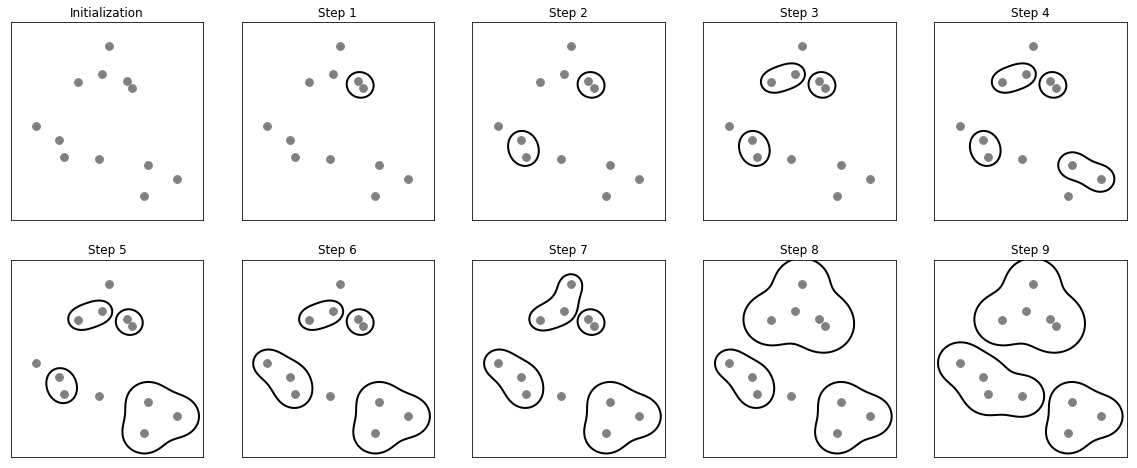

In [4]:
import mglearn
from matplotlib import pyplot as plt
mglearn.plots.plot_agglomerative_algorithm()
plt.show()

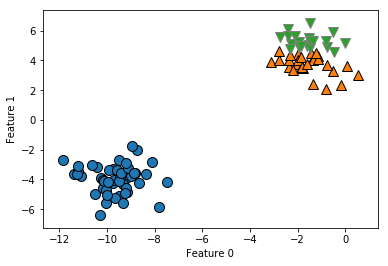

In [7]:
# アルゴリズムの動作の関係上、疑集型クラスタリングは新しいでえーたに対して予測をすることができない
from sklearn.cluster import AgglomerativeClustering
from mglearn.datasets import make_blobs
from matplotlib import pyplot as plt

X, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()

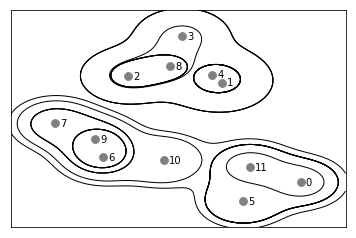

In [8]:
mglearn.plots.plot_agglomerative()
plt.show()

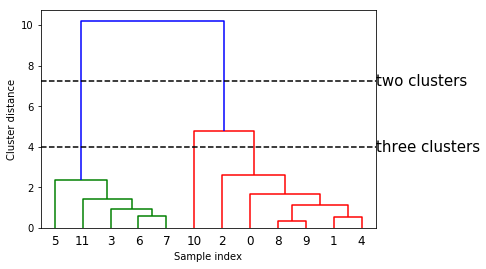

In [10]:
# 階層型クラスタリングの可視化にはデンドログラムを使用する
from scipy.cluster.hierarchy import dendrogram, ward
from matplotlib import pyplot as plt

X, y = make_blobs(random_state=0, n_samples=12)
# wardクラスタリングをデータ配列Xに適用
# Scipyのward関数は疑集型クラスタリングを扱った際のブリッジ距離を示す配列を返す
linkage_array = ward(X)
# このlinkage_arrayに書かれたクラス間距離をデンドログラムとしてプロットする
dendrogram(linkage_array)

# 2クラスタと3クラスタの部分での切断を表示
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

#  y軸の枝の長さが2つのクラスタがどれだけ離れているかを示している
ax.text(bounds[1], 7.25, 'two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, 'three clusters', va='center', fontdict={'size': 15})
plt.xlabel('Sample index')
plt.ylabel('Cluster distance')
plt.show()

Cluster membership: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


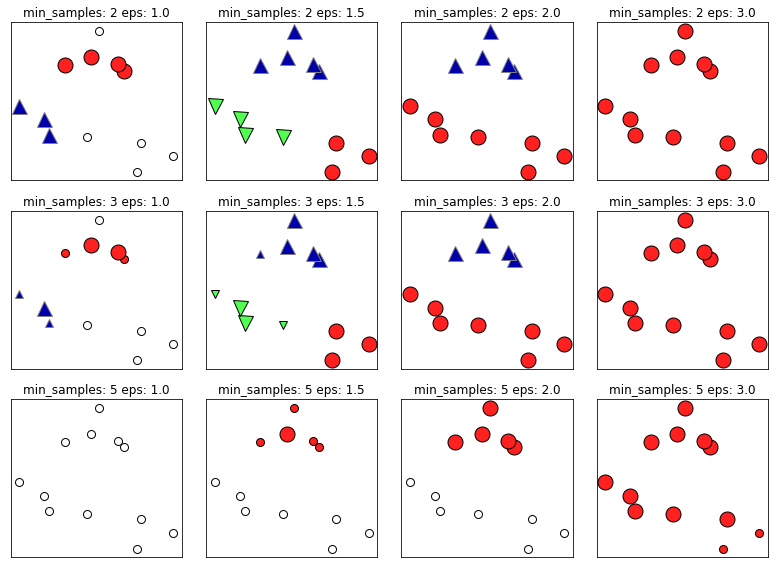

In [12]:
# two_moons データセットのような複雑なものはDBSCANで扱える
# DBSCANはdensity-based spatial clustering of applications with noise(密度に基づくノイズあり空間クラスタリング)であり、
# ユーザが先験的にクラスタ数を与える必要がなく、どのクラスタにも属さない点を判別できる

# 特徴量が高密度な領域を見つける。一定数データポイント（距離で判断）が含まれるポイントをコアポイントとする
# データポイントを処理する順序に依存して、境界は若干変わるがそこまで大きな問題ではない
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print(f"Cluster membership: {clusters}")

mglearn.plots.plot_dbscan()
plt.show()
# 良いスケールを見つける場合には、StandardScalerやMinMaxScalerでスケールを調整した後の方が容易なケースが多い

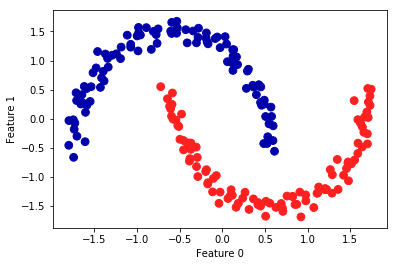

In [19]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# データ平均0分散1にスケール変換
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)

# クラスタリング結果をプロット
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel(f"Feature 0")
plt.ylabel(f"Feature 1")
plt.show()